# Transformación pasabanda
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 

En este documento presentamos el uso de las siguientes funciones para el análisis de la transformación pasabanda de funciones transferencia:

* [analyze_sys]()
* [pretty_print_bicuad_omegayq]()
* [parametrize_sos]()


### Introducción

A esta altura del curso, hemos diseñado filtros pasabajo normalizados de orden arbitrario, dependiendo de las restricciones de módulo o retardo impuestas por el problema. Extendemos el problema de diseñar *cualquier* tipo de función transferencia (pasa-alto, pasabanda, etc) al siguiente procedimiento:

1. Identificar el tipo de filtro requerido por la plantilla original (atenuación o módulo de la transferencia)
2. Convertir la plantilla del filtro, mediante el núcleo de transformación adecuado, a una plantilla pasabajo.
3. Diseñar una función transferencia pasabajo normalizada.
4. Aplicar un núcleo de transformación adecuado.

Este documento se centra en analizar el comportamiento del núcleo de transformación **pasabanda normalizado**. Para ello recordamos su expresión:

$$ K_{bp}(s) = Q_{bp} * \frac{s^2 + 1}{s} $$

Usamos $p$ como variable compleja en el dominio del prototipo pasabajo (2do paso) solo para señalar que *no* se trata de la misma variable, ni transferencia. Luego al llegar al paso 4, podemos obtener la transferencia pasabanda como

$$ T_{bp}(s) = T_{Lp}(p)\Big\vert_{p = K_{bp}} $$

También se sabe que para una transferencia $T(s)$ de orden arbitrario, la misma se puede expresar como el producto de secciones de segundo orden (SOS), y eventualmente en el caso que el orden fuera impar, una sección de primer orden. Por este motivo en este documento analizaremos el comportamiento del núcleo exclusivamente para secciones de primer y segundo orden. El comportamiento para un orden arbitrario, se podrá deducir del comportamiento para cada sección individual.


### Sección de primer orden

Sea la función transferencia de un *filtro prototipo pasabajo*

$$ T_{Lp} = \frac{k.a}{p + a}, $$

siendo $a$ un número real que indica la pulsación de corte, y $k$ la ganancia para $p = 0$, entonces 

$$ T_{bp}(s) = T_{Lp}(p)\Big\vert_{p = K_{bp}} $$

$$ T_{bp}(s) = \frac{a}{ Q_{bp} * \frac{s^2 + 1}{s} + a} $$


$$ T_{bp}(s) = \frac{s . k . \frac{a}{Q_{bp}} }{s^2 + s . \frac{a}{Q_{bp}} + 1} $$

Como se observa, se llega a un filtro pasabanda normalizado donde se puede apreciar:

* El centro de la banda de paso se encuentra en $\omega_0 = 1$
* La ganancia en el centro de la banda de paso depende de $k$
* El Q del pasabanda resultante estará dado por $Q = \frac{Q_{bp}}{a}$

En el siguiente ejemplo se mostrará cómo llegar a estos resultados a partir de las herramientas de simulación simbólica y numérica.

In [1]:
# Módulos externos

import sympy as sp
from sympy.abc import s

import matplotlib as mpl
import matplotlib.pyplot as plt

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi

fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


In [2]:
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle


In [3]:
# Comienzo de la simulación

Q_bp, a, b, k = sp.symbols("Q_bp, a, b, k", complex = False)

############################################
# Definicion de las funciones transferencia. 

H1 = k * a/(s + a)

# nucleo de transformación pasabanda
Kbp = Q_bp * (s**2 + 1) / s


# Análisis de la transformación pasabanda para una transferencia de primer orden.
H1bp = sp.simplify(sp.expand(H1.subs(s, Kbp)))
num, den = sp.fraction(H1bp)
num = sp.Poly(num,s)
den = sp.Poly(den,s)
num1_bp, den1_bp, w1_on, Q1_n, w1_od, Q1_d, K1_bp  = parametrize_sos(num, den)

print_subtitle('Primer orden')

print_latex('$ T(s) = ' + sp.latex(H1) + '$')
print_latex('$ T(s) |_{s = ' + sp.latex(Kbp) +  ' } = ' + sp.latex(K1_bp) + ' \\frac{ ' + sp.latex(num1_bp.as_expr()) + '}{' + sp.latex(den1_bp.as_expr()) + '} $')



#### Primer orden

<IPython.core.display.Math object>

<IPython.core.display.Math object>

luego de esta pequeña demostración de las capacidades de manejo simbólico haremos una simulación numérica

In [4]:
import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown


In [5]:
# coeficientes de la transferencia de primer orden T1
T1_num = np.array([1])
T1_den = np.array([1, 1])

# Q de la transformación
Q_bp = 5

# núcleo LP-BP
num_pbanda, den_pbanda = sig.lp2bp(T1_num, T1_den, bw = 1/Q_bp)

display(Markdown('### Filtro pasabanda segundo orden normalizado Q = 5' ))

print_subtitle('Como lo muestra SciPy')

print(num_pbanda)
print(den_pbanda)

print_subtitle('Como cociente de polinomios')

# forma un poco más clara
pretty_print_lti(num_pbanda, den_pbanda)

print_subtitle('Factorizado con $\omega_0$ y $Q$')

# esta es la que va
pretty_print_bicuad_omegayq(num_pbanda, den_pbanda)

display(Markdown('![messirve](messirve.jpeg)' ))


### Filtro pasabanda segundo orden normalizado Q = 5

#### Como lo muestra SciPy

[0.2 0. ]
[1.  0.2 1. ]


#### Como cociente de polinomios

<IPython.core.display.Math object>

#### Factorizado con $\omega_0$ y $Q$

<IPython.core.display.Math object>

![messirve](messirve.jpeg)

De esta manera la comparación visual se ve facilitada. Continuando con el análisis

[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, []],
 [4,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

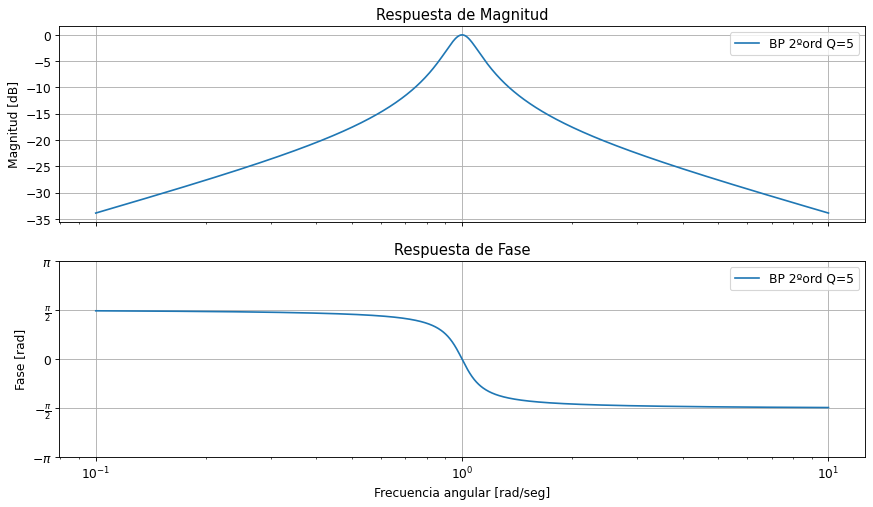

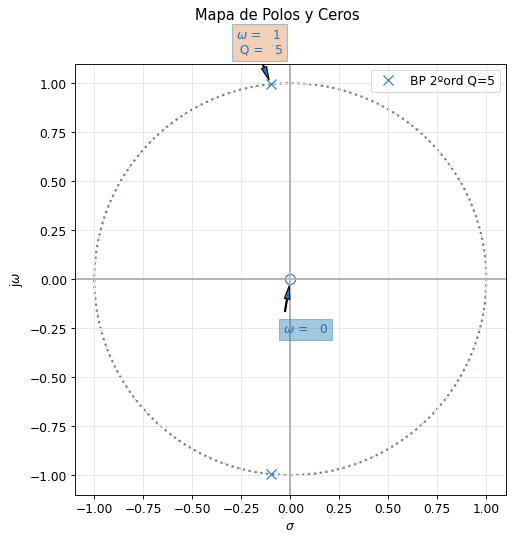

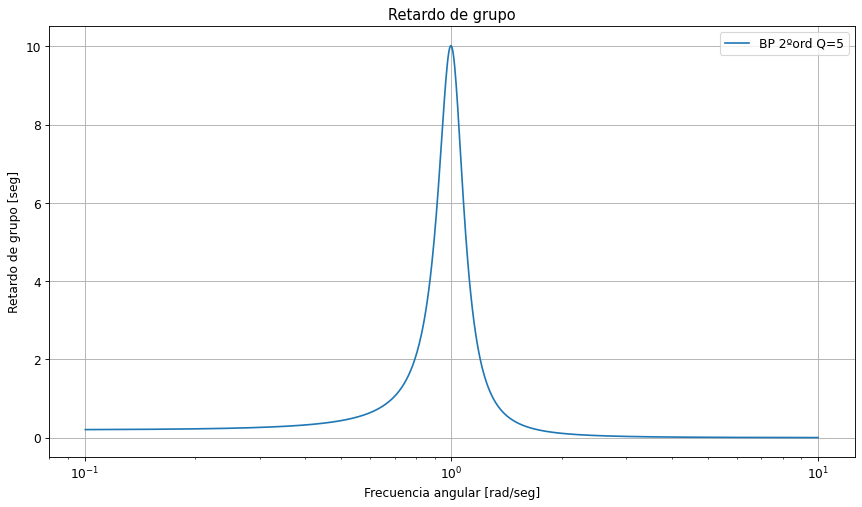

In [6]:
T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

analyze_sys([T1_bp], sys_name='BP 2ºord Q={:d}'.format(Q_bp))


Confirmamos que llegamos a la función transferencia pasabanda de $Q=5$

### Sección de segundo orden como prototipo

En este caso, la función transferencia *prototipo* será

$$ T_{Lp} = \frac{k.b}{p^2 + p.a + b}, $$

siendo $a, b$ y $k$ coeficientes reales y positivos. Procediendo del mismo modo

$$ T_{bp}(s) = T_{Lp}(p)\Big\vert_{p = K_{bp}} $$

llegaremos a una función pasabanda de orden 4, para lo cual utilizaremos las posibilidades que nos da el análisis simbólico

In [7]:

H2 = k*b/(s**2 + s*a + b)

H2bp = sp.simplify(sp.expand(H2.subs(s, Kbp)))

num2_bp, den2_bp = sp.fraction(H2bp)

num2_bp = sp.Poly(num2_bp, s)

den2_bp = sp.Poly(den2_bp,s)

den_bp_lc = den2_bp.LC()
den2_bp = den2_bp.monic()

print_latex(sp.latex(num2_bp/den_bp_lc * 1/den2_bp))


<IPython.core.display.Math object>

lamenatablemente no es sencillo ordenar los polinomios como uno está acostumbrado a escribirlos, pero si se presta atención, se notará que existe simetría en los valores de los coeficientes del denominador. Luego plantearemos la siguiente factorización


$$ H_2(s) = \frac{s^2.k.b}{s^4 + s^3 . \frac{a}{Q_{bp}} + s^2 . \frac{2Q^2_{bp}+b}{Q^2_{bp}} + s . \frac{a}{Q_{bp}} + 1}  = \frac{s.k_1.\omega_1^2}{s^2+s\frac{\omega_1}{Q_1}+\omega_1^2} . \frac{s.k_2.\omega_2^2}{s^2+s\frac{\omega_2}{Q_2}+\omega_2^2}  $$


In [8]:

w_o1, w_o2, qq1, qq2 = sp.symbols("w_1, w_2, q_1, q_2", complex = False)

# planteando la distributiva
den1 = s**2 + s*w_o1/qq1 + w_o1**2
den2 = s**2 + s*w_o2/qq2 + w_o2**2

den4 = den1 * den2

den4 = sp.Poly(den4,s)

print_latex(sp.latex(den4))

den4_coeffs = den4.all_coeffs()

# coef s^0
#print_latex(sp.latex(den4_coeffs[-1]))


<IPython.core.display.Math object>

Por observación surge una primer relación muy importante

$$ \omega_1^2 .\omega_2^2 = 1 $$

es decir que 

$$ \omega_1 = \frac{1}{\omega_2} $$

Luego, del mismo modo, analizando las restricciones de los coeficientes de primer y tercer orden surge que




In [9]:

c3 = den4_coeffs[1]

c1 = den4_coeffs[3]

# substituimos la relación obtenida
c3 = c3.subs(w_o2, 1/w_o1)
c1 = c1.subs(w_o2, 1/w_o1)

# coef s^3
print_latex(sp.latex(c3))

# coef s
print_latex(sp.latex(c1))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Es decir que la igualdad que debe darse será

$$  \frac{ \frac{q_1}{\omega_1} + q_2.\omega_1}{q_1.q_2} = \frac{ \frac{q_2}{\omega_1} + q_1.\omega_1}{q_1.q_2} = \frac{a}{Q_{bp}} $$

$$  \frac{ \omega_2 - \omega_1}{q_1} = \frac{ \omega_2 - \omega_1}{q_2} $$


Lo cual indica finalmente que $q_1 = q_2$. Podemos concluir entonces que para un *prototipo pasabajo de segundo orden* 

* se obtendrá una función transferencia pasabanda de orden 4 normalizada ($\omega_0 = 1$).
* la transferencia podrá entenderse como la cascada de dos pasabandas de segundo orden.
* cada pasabanda tendrá pulsaciones recíprocas $\omega_1 = \frac{1}{\omega_2}$
* ambos pasabanda tendrán igual factor de selectividad Q, es decir $q_1 = q_2$

Estas observaciones se pueden expresar matemáticamente como

$$ H_2(s) = \frac{s^2.k.b}{s^4 + s^3 . \frac{a}{Q_{bp}} + s^2 . \frac{2Q^2_{bp}+b}{Q^2_{bp}} + s . \frac{a}{Q_{bp}} + 1}  = k.\frac{s.\omega_1^2}{s^2+s\frac{\omega_1}{q_1}+\omega_1^2} . \frac{\frac{s}{\omega_1^2}}{s^2+s\frac{q_1}{\omega_1}+\frac{1}{\omega^2_1}}  $$


A continuación finalizaremos la explicación mediante la simulación numérica


In [10]:
# coeficientes de la transferencia de primer orden T1
T2_num = np.array([1])
T2_den = np.array([1, np.sqrt(2), 1])

# Q de la transformación
Q_bp = 5

# núcleo LP-BP
num_pbanda, den_pbanda = sig.lp2bp(T2_num, T2_den, bw = 1/Q_bp)

display(Markdown('### Filtro pasabanda cuarto orden normalizado Q = 5' ))

print_subtitle('Como lo muestra SciPy')

print(num_pbanda)
print(den_pbanda)

print_subtitle('Como cociente de polinomios')

# forma un poco más clara
pretty_print_lti(num_pbanda, den_pbanda)

# esta es la que va

print_subtitle('Factorizado en SOS')

sos_pbanda = tf2sos_analog(num_pbanda, den_pbanda)

# la visualizamos de algunas formas, la tradicional
pretty_print_SOS(sos_pbanda)

display(Markdown('![messirve](messirve.jpeg)' ))

print_subtitle('Factorizado y parametrizado')

pretty_print_SOS(sos_pbanda, mode='omegayq')

display(Markdown('![messi_campeon](messi_campeon.jpg)' ))



### Filtro pasabanda cuarto orden normalizado Q = 5

#### Como lo muestra SciPy

[0.04 0.   0.  ]
[1.         0.28284271 2.04       0.28284271 1.        ]


#### Como cociente de polinomios

<IPython.core.display.Math object>

#### Factorizado en SOS

<IPython.core.display.Math object>

![messirve](messirve.jpeg)

#### Factorizado y parametrizado

<IPython.core.display.Math object>

![messi_campeon](messi_campeon.jpg)

[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, []],
 [4,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

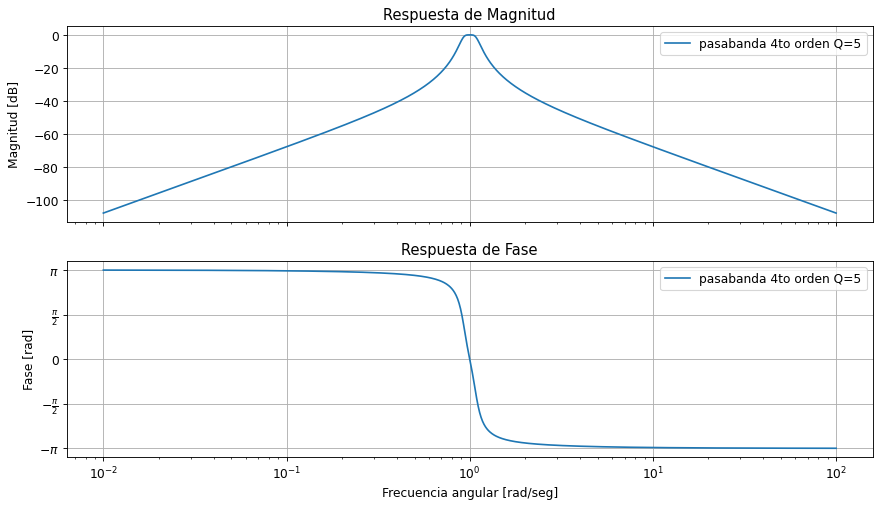

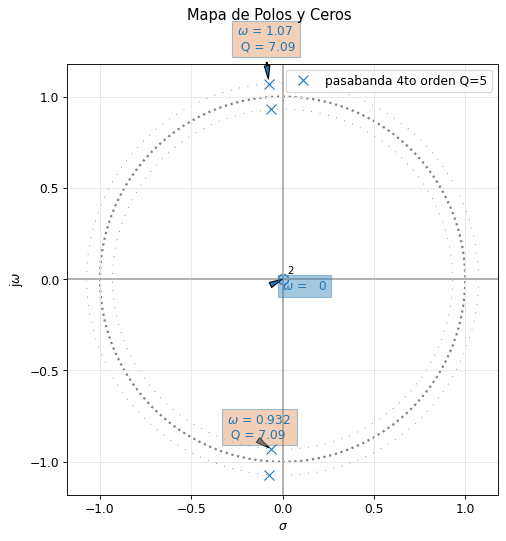

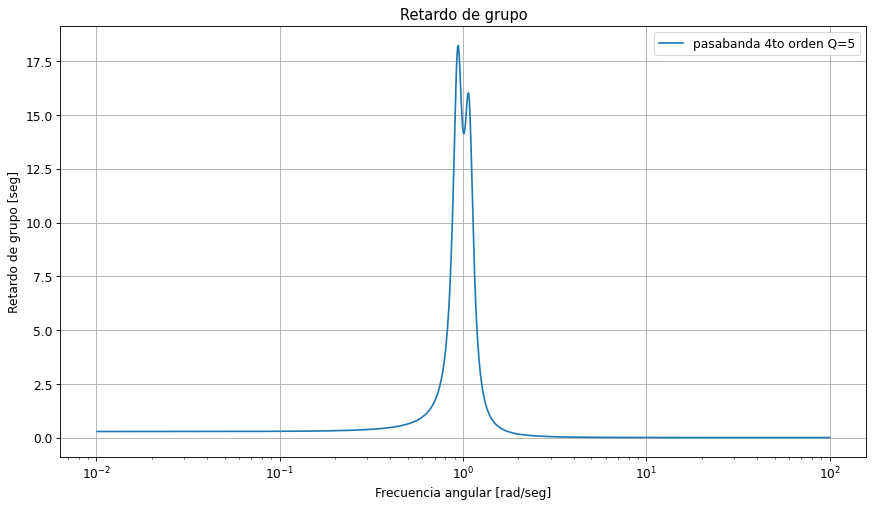

In [11]:
T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

analyze_sys(T1_bp, sys_name='pasabanda 4to orden Q={:d}'.format(Q_bp))


Notar en el diagrama de polos y ceros las observaciones que se hicieron más arriba:

* $ \omega_1 = 1.073 $ y $ q_1 = 7.09 $
* $ \omega_2 = 0.932 $ y $ q_2 = 7.09 $
* $ \omega_1 = \frac{1}{\omega_2} $

Se deja para quien lea y tenga interés, verificar en el diagrama de módulo el ancho de banda del filtro implementado:

$$ \mathrm{BW} = \frac{1}{Q_{bp}} $$